In [2]:
# check that gauss fitting that we perform is correct

In [3]:
# TODO: 
# - rename load_data in load_intensity

In [4]:
# imports
import os
import glob
from functools import reduce
import re

import matplotlib.pyplot as plt
import numpy as np
import csv as csv

from sklearn import linear_model, datasets

from scipy.stats import norm

%matplotlib inline

In [5]:
def f_x(x, A, b, x_0):
    return A*np.exp(-b*(x - x_0)*(x - x_0))

In [6]:
# some initial params for gauss fitting
# 1,2 and 3 params in the output respectively

x_0 = 17.523355892373665
A = 155.84740221812524
b = 0.016342504461073184

# x_0 = 23.74189290666236
# A = 94.29371812477112
# b = 0.014977371113259523

# x_0 = 30.56102074524605
# A = 72.60436473594147
# b = 0.005385495025872098

# scaling = 100
# x_0 = 17.331937782306806 
# A = 161.08340269358348
# b = 0.018851561280863825
sigma = np.sqrt(1/(2*b))
print ("x_0:", x_0)
print ("A:", A)
print ("b:", b)
print ("sigma:", sigma)

x_0: 17.523355892373665
A: 155.84740221812524
b: 0.016342504461073184
sigma: 5.53128066919


In [7]:
# function for loading one data-set
def load_data(file_path):
    data = np.loadtxt(file_path, delimiter = ',', skiprows=1)
    # print(data.shape) 
    if (len(data.shape) < 2):
        data = data[None, :]
    if (data.shape[1] == 0):
        I = np.array([0])
    else:
        I = data[:, -1]
    return I

In [8]:
# read the parametes for fitting the gaussian
def load_parameters(full_file_path):
    data = np.loadtxt(full_file_path, delimiter = ' ') # whitespace is the default delimiter, too
    return data

I_min: 4.881404 I_max: 94.071572


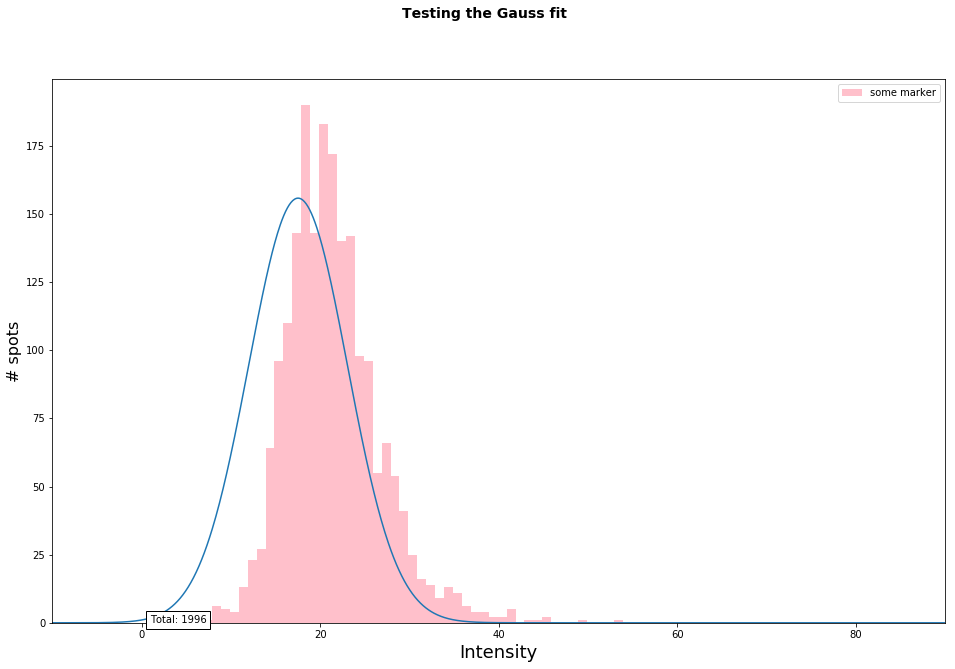

In [9]:
filepath = "/Users/kkolyva/Desktop/wow-desktop/05.nd2 - C=0-1.csv"
I = load_data(filepath) / 100

binwidth = 1
labels = 'some marker'

fig = plt.figure(figsize=(16,10))
title = "Testing the Gauss fit"
fig.suptitle(title, fontsize=14, fontweight='bold')
    
plt.xlabel('Intensity', fontsize=18)
plt.ylabel('# spots', fontsize=16)

print("I_min:", min(I), "I_max:", max(I))

plt.hist(I, bins=np.arange(min(I), max(I) + binwidth, binwidth), color='pink', label=labels);
plt.text(0.9, 0.1, "Total: " + str(I.shape[0]), color='black', bbox=dict(facecolor='white', alpha=1))

xmin = -10
xmax = 90

# min_x = 0
# max_x = 94

x = np.linspace(xmin, xmax, 1000)
y = f_x(x, A, b, x_0)
plt.plot(x, y)

plt.xlim([xmin, xmax])

# #         if (j == 2):
# #             ax.set_ylim([0, 2500])
# #         else:
# #             ax.set_ylim([0, 200])




plt.legend(loc = 'upper right')

In [10]:
min_x = -10
max_x = 140

x = np.linspace(min_x, max_x, 1000)
y = f_x(x, A, b, x_0)

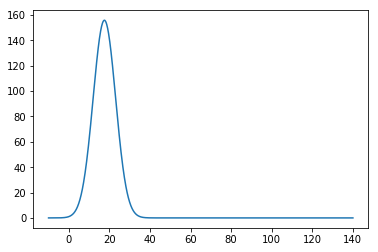

In [11]:
plt.plot(x, y)

In [12]:
# general setup for pretty images 
folder_path = os.getcwd() + '/data/processed/'
image = 'N2_DPY23-ex-int_mdh1_004'

dataset = []
for path1 in glob.iglob(folder_path + image + "/c" + str(0 + 1) + "-result/*"):
    
    repls = (" - C=0-", " - C=2-"), ("c1-result", "c3-result")
    path2 = reduce(lambda a, kv: a.replace(*kv), repls, path1)
    
    repls = (" - C=0-", " - C=1-"), ("c1-result", "c2-result")
    path3 = reduce(lambda a, kv: a.replace(*kv), repls, path1)

    dataset.append([path1, path2, path3])
    
print(folder_path)

/Users/kkolyva/pretty-graphs/data/processed/


In [13]:
# general setup for pretty images 
folder_path = os.getcwd() + '/data/gauss/'
image = 'N2_DPY23-ex-int_mdh1_004'

parameters = []
for path1 in glob.iglob(folder_path + image + "/c" + str(0 + 1) + "-result/*"):
    
    repls = (" - C=0-", " - C=2-"), ("c1-result", "c3-result")
    path2 = reduce(lambda a, kv: a.replace(*kv), repls, path1)
    
    repls = (" - C=0-", " - C=1-"), ("c1-result", "c2-result")
    path3 = reduce(lambda a, kv: a.replace(*kv), repls, path1)

    parameters.append([path1, path2, path3])
    
print(folder_path)

/Users/kkolyva/pretty-graphs/data/gauss/


In [14]:
# check that all paths are there 
print("dataset:", len(dataset))
print("parameters:", len(parameters))

# check that all files exist
for path in dataset:
    for j in range(0,2):
        if (not os.path.isfile(path[j])):
            print(path, "bad", path[j])
    
# check that all files exist
for path in parameters:
    for j in range(0,2):
        if (not os.path.isfile(path[j])):
            print(path, "bad", path[j])

dataset: 11
parameters: 11


In [15]:
# generate the figure name 
# /Users/kkolyva/pretty-graphs/data/processed/MK4_DPY23-ex-int_mdh1_003/c1-result/15.nd2 - C=0-1.csv
# /Users/kkolyva/pretty-graphs/data/processed/MK4_DPY23-ex-int_mdh1_003/c1-result/15.nd2 - C=0-1.csv

# [^/]+$ -> series name
# [^/]+/[^/]+$ -> file name ? not working
# 
for path in parameters:
    for j in range(0,3):
        # m = re.search('[^/]+$', path[j])
        path[j].split("/")
        # print(path[j].split("/")[6], path[j].split("/")[8])

In [16]:
# create the file path the gaussian fit parameters
def create_path(path_):
    gauss_path = path_.replace("processed", "gauss").replace("csv", "txt")
    return gauss_path

# path = "/Users/kkolyva/pretty-graphs/data/processed/MK4_DPY23-ex-int_mdh1_003/c1-result/15.nd2 - C=0-1.csv"
# gauss_path = create_path(path)
# print("before:", path)
# print("after: ", gauss_path)

In [17]:
def create_title(path):
    # get the name of hte initial image (like in the experiment)
    image_name = path.split("/")[6]
    series_name = path.split("/")[8]
    # create the full title 
    title = image_name + " : " + series_name
    return title

In [62]:
# th is the threshold
def filter_intensity(I_, th):
    eps = 0.7;
    # print(I)
    I_res  = I_[np.abs(I_ - th) < I_*eps];
    # print(I)
    return I_res 

In [96]:
# smoothen the data a little bit
from numpy.lib.stride_tricks import as_strided
def running_average_strides(seq, window=7):
    stride = seq.strides[0]
    sequence_strides = as_strided(seq, shape=[len(seq) - window + 1, window], strides=[stride, stride])    
    return np.average(sequence_strides, axis=1) # , weights=[0.04, 0.06, 0.15, 0.5, 0.15, 0.06, 0.04])

Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c1-result/04.nd2 - C=0-1.csv
3.60796755512 vs 17.6619274926
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c1-result/04.nd2 - C=0-1.txt
x_0: 16.724199202
A: 13.2446807063
b: 0.0299098930298
Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c3-result/04.nd2 - C=2-1.csv
3.60796755512 vs 15.7672883365
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c3-result/04.nd2 - C=2-1.txt
x_0: 14.8323004116
A: 98.516785583
b: 0.00840112619641
Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c2-result/04.nd2 - C=1-1.csv
3.60796755512 vs 3.54903326875
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c2-result/04.nd2 - C=1-1.txt
x_0: 3.13982458543
A: 350.681615556
b: 0.463432934625


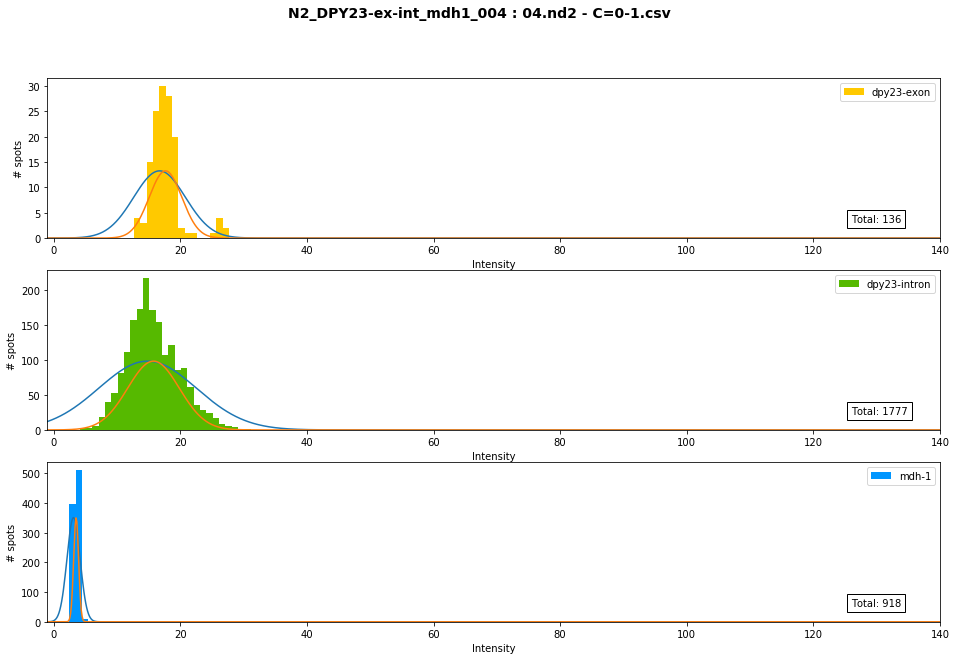

Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c1-result/05.nd2 - C=0-1.csv
3.60796755512 vs 45.6188418049
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c1-result/05.nd2 - C=0-1.txt
x_0: 42.8776547473
A: 31.2675114855
b: 0.00262436558029
Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c3-result/05.nd2 - C=2-1.csv
3.60796755512 vs 70.7374388569
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c3-result/05.nd2 - C=2-1.txt
x_0: 58.3152917457
A: 5.07512737202
b: 0.000340851080691
Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c2-result/05.nd2 - C=1-1.csv
3.60796755512 vs 4.03031095583
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c2-result/05.nd2 - C=1-1.txt
x_0: 3.11957297692
A: 776.963470411
b: 0.191959621976


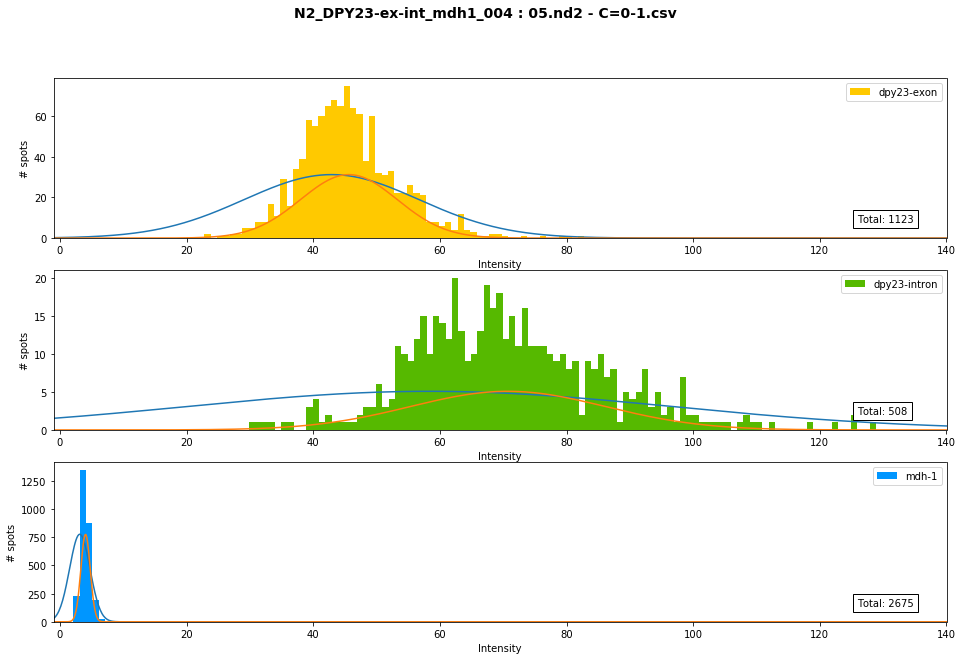

Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c1-result/02.nd2 - C=0-1.csv
3.60796755512 vs 39.6739464377
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c1-result/02.nd2 - C=0-1.txt
x_0: 23.7038062284
A: 68.0
b: 0.00672585862481
Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c3-result/02.nd2 - C=2-1.csv
3.60796755512 vs 19.5959146861
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c3-result/02.nd2 - C=2-1.txt
x_0: 18.7954544286
A: 67.9026343785
b: 0.00434569674997
Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c2-result/02.nd2 - C=1-1.csv
3.60796755512 vs 3.32895950693
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c2-result/02.nd2 - C=1-1.txt
x_0: 2.91652624647
A: 873.428440486
b: 0.303186254813


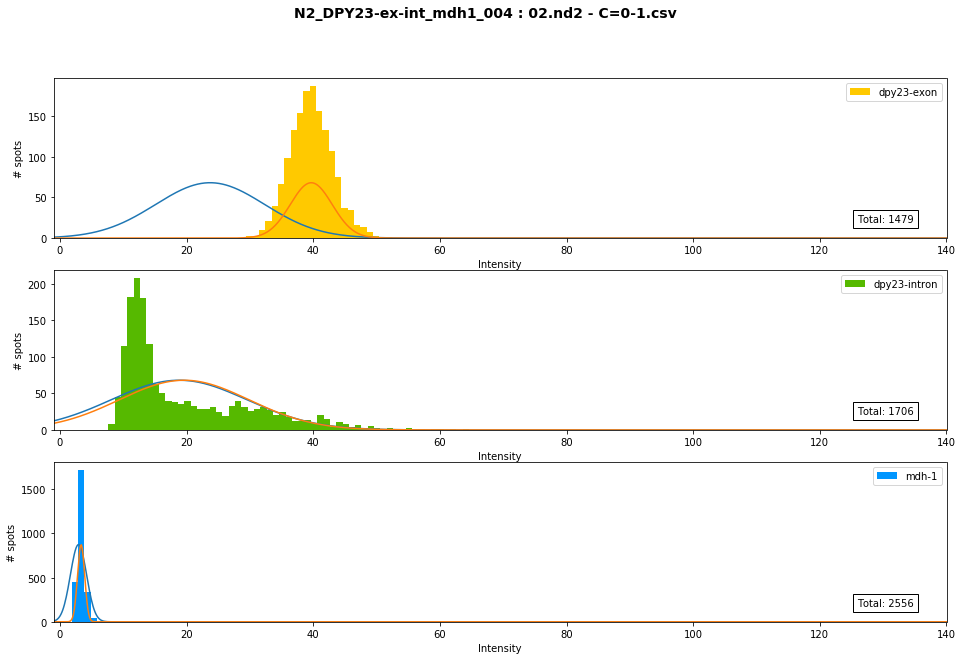

Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c1-result/07.nd2 - C=0-1.csv
3.60796755512 vs 47.121405847
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c1-result/07.nd2 - C=0-1.txt
x_0: 43.6463427985
A: 45.0858852025
b: 0.00208759985016
Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c3-result/07.nd2 - C=2-1.csv
3.60796755512 vs 13.0741890003
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c3-result/07.nd2 - C=2-1.txt
x_0: 11.3826762181
A: 148.713842172
b: 0.00666605647512
Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c2-result/07.nd2 - C=1-1.csv
3.60796755512 vs 9.99229007481
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c2-result/07.nd2 - C=1-1.txt
x_0: 6.7304257169
A: 120.320617239
b: 0.0414424201509


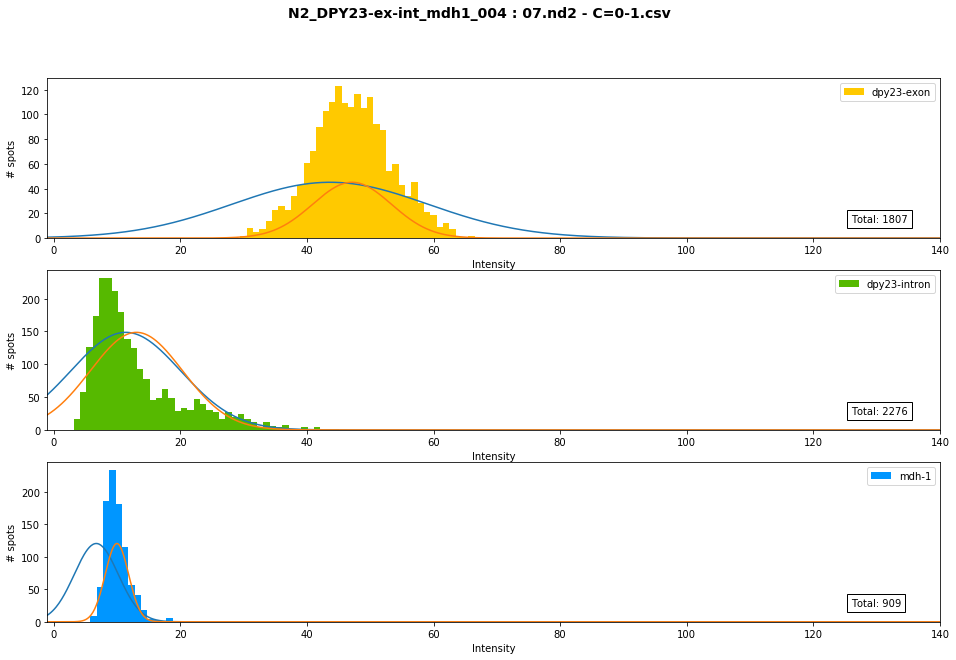

Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c1-result/08.nd2 - C=0-1.csv
3.60796755512 vs 61.8761741317
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c1-result/08.nd2 - C=0-1.txt
x_0: 46.3030067469
A: 87.9520618106
b: 0.00261790461568
Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c3-result/08.nd2 - C=2-1.csv
3.60796755512 vs 50.8794060136
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c3-result/08.nd2 - C=2-1.txt
x_0: 49.8630844597
A: 49.1774612949
b: 0.00125779939417
Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c2-result/08.nd2 - C=1-1.csv
3.60796755512 vs 7.2495915874
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c2-result/08.nd2 - C=1-1.txt
x_0: 6.82535391781
A: 376.25458273
b: 0.0961896041375


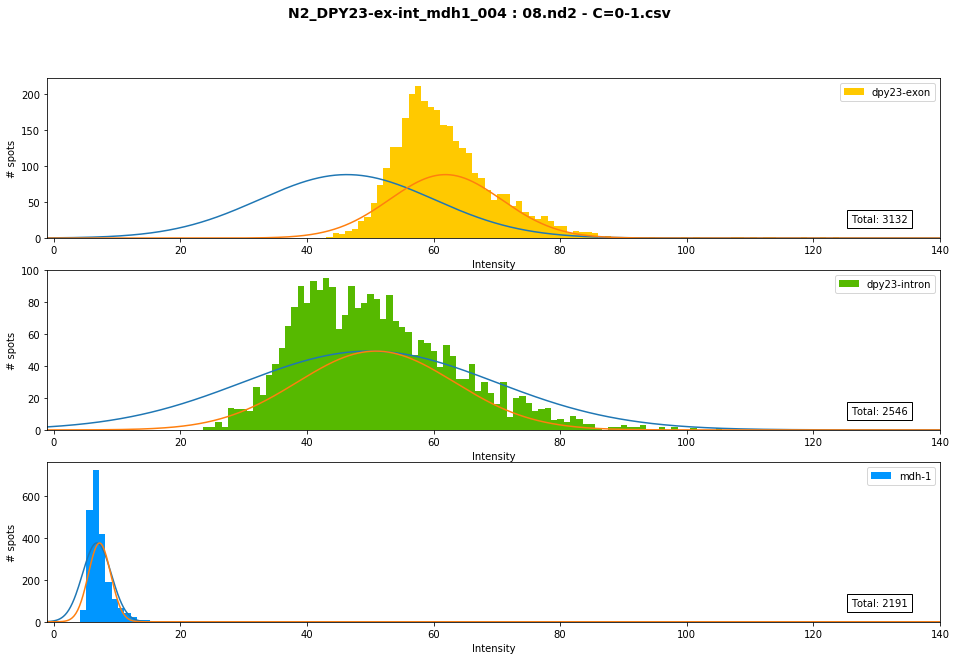

Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c1-result/01.nd2 - C=0-2.csv
3.60796755512 vs 37.6159321438
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c1-result/01.nd2 - C=0-2.txt
x_0: 25.2136170213
A: 56.0
b: 0.00584906628546
Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c3-result/01.nd2 - C=2-2.csv
3.60796755512 vs 12.753730182
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c3-result/01.nd2 - C=2-2.txt
x_0: 10.9808512552
A: 154.821007033
b: 0.0228660560742
Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c2-result/01.nd2 - C=1-2.csv
3.60796755512 vs 4.58434311094
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c2-result/01.nd2 - C=1-2.txt
x_0: 3.24174687596
A: 618.096642942
b: 0.179811582729


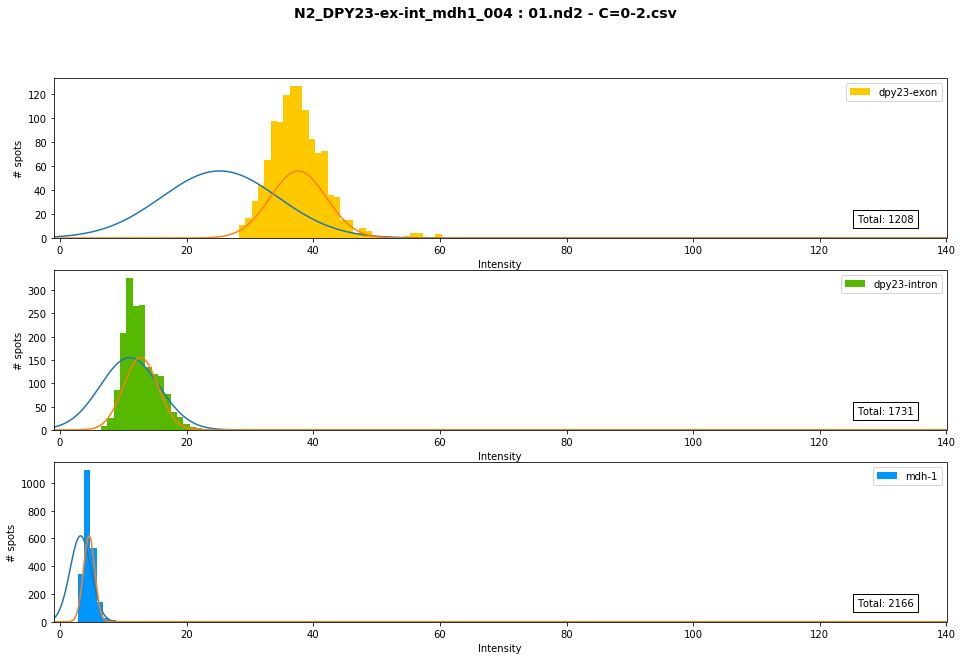

Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c1-result/01.nd2 - C=0-1.csv
3.60796755512 vs 29.8536376299
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c1-result/01.nd2 - C=0-1.txt
x_0: 15.047012904
A: 2.42611877657
b: 0.00715190627174
Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c3-result/01.nd2 - C=2-1.csv
3.60796755512 vs 15.529559424
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c3-result/01.nd2 - C=2-1.txt
x_0: 15.5184059089
A: 102.605607336
b: 0.0073844285249
Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c2-result/01.nd2 - C=1-1.csv
3.60796755512 vs 3.83056954488
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c2-result/01.nd2 - C=1-1.txt
x_0: 3.00175438596
A: 244.0
b: 0.534710953263


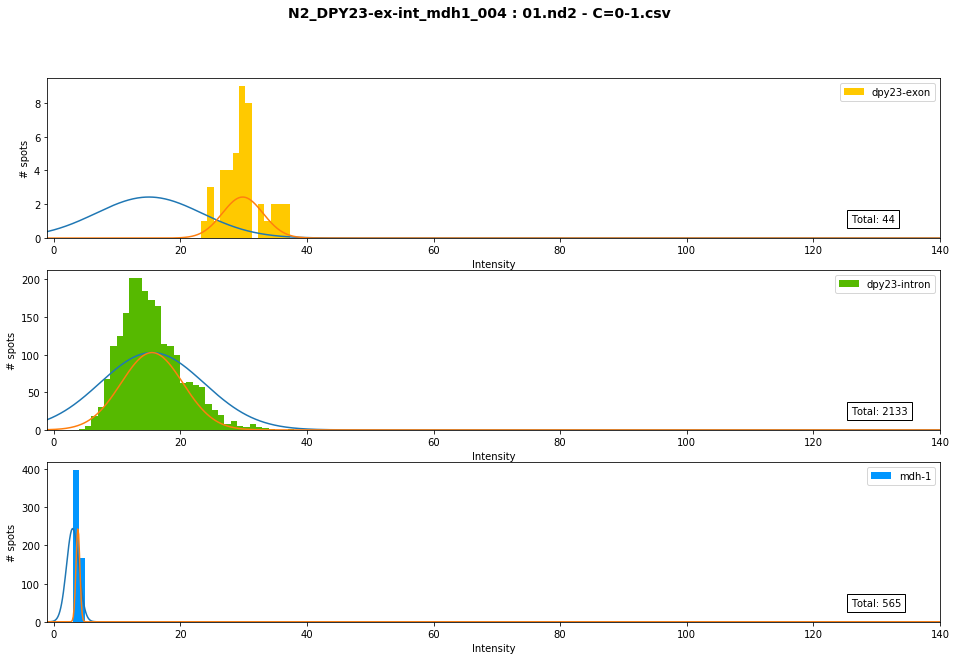

Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c1-result/09.nd2 - C=0-2.csv
3.60796755512 vs 27.2429158865
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c1-result/09.nd2 - C=0-2.txt
x_0: 25.2523987924
A: 27.034538804
b: 0.00400932444931
Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c3-result/09.nd2 - C=2-2.csv
3.60796755512 vs 21.8574313785
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c3-result/09.nd2 - C=2-2.txt
x_0: 16.1952405394
A: 9.42915765694
b: 0.0148138508754
Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c2-result/09.nd2 - C=1-2.csv
3.60796755512 vs 4.84025236929
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c2-result/09.nd2 - C=1-2.txt
x_0: 2.29616938868
A: 43.7229475764
b: 0.234677778653


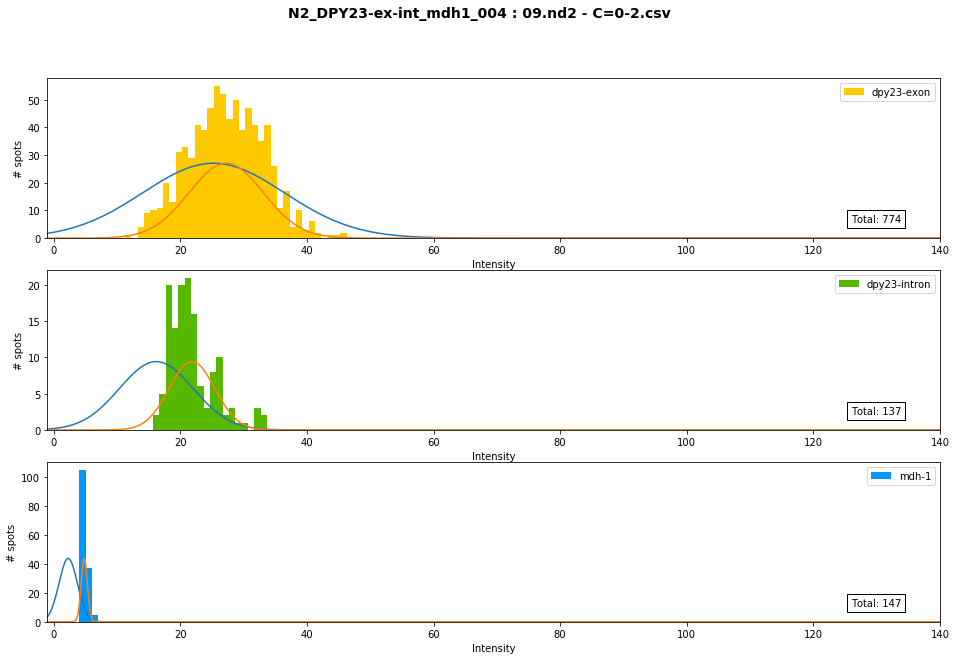

Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c1-result/06.nd2 - C=0-1.csv
3.60796755512 vs 47.3352577564
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c1-result/06.nd2 - C=0-1.txt
x_0: 44.1516730511
A: 49.9794260953
b: 0.00256129163858
Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c3-result/06.nd2 - C=2-1.csv
3.60796755512 vs 14.3178288471
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c3-result/06.nd2 - C=2-1.txt
x_0: 12.7472600569
A: 138.819985564
b: 0.0116820582797
Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c2-result/06.nd2 - C=1-1.csv
3.60796755512 vs 8.54994415617
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c2-result/06.nd2 - C=1-1.txt
x_0: 5.50207004373
A: 164.438108063
b: 0.0504298337671


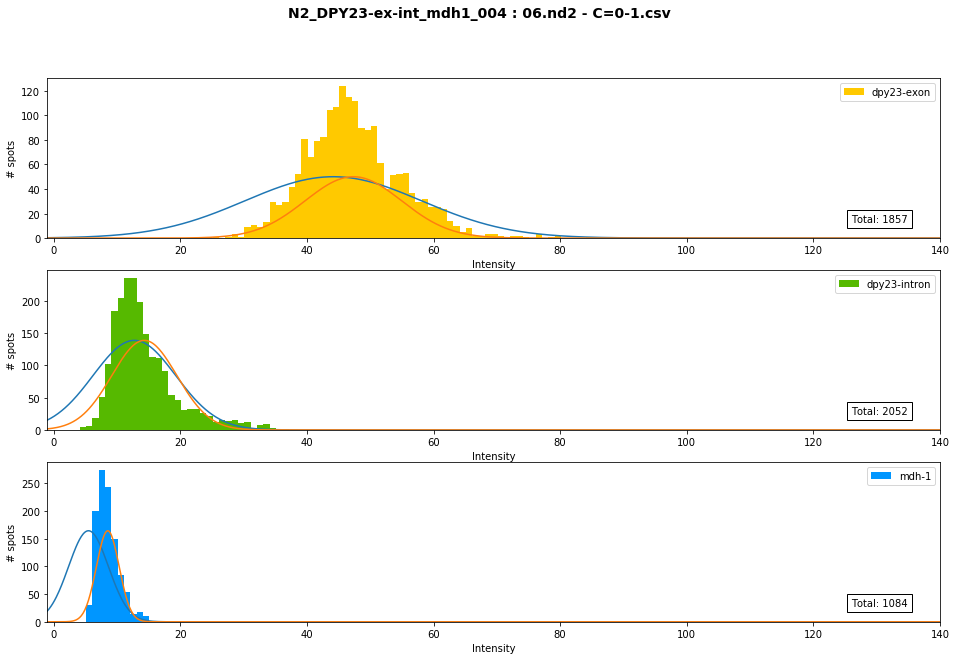

Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c1-result/09.nd2 - C=0-1.csv
3.60796755512 vs 51.6265000663
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c1-result/09.nd2 - C=0-1.txt
x_0: 48.1206476054
A: 49.6560927814
b: 0.00193662854569
Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c3-result/09.nd2 - C=2-1.csv
3.60796755512 vs 33.1029377538
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c3-result/09.nd2 - C=2-1.txt
x_0: 30.1892615029
A: 64.7536975202
b: 0.00251588046718
Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c2-result/09.nd2 - C=1-1.csv
3.60796755512 vs 6.51909224252
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c2-result/09.nd2 - C=1-1.txt
x_0: 5.67632355589
A: 366.947180449
b: 0.0953080966497


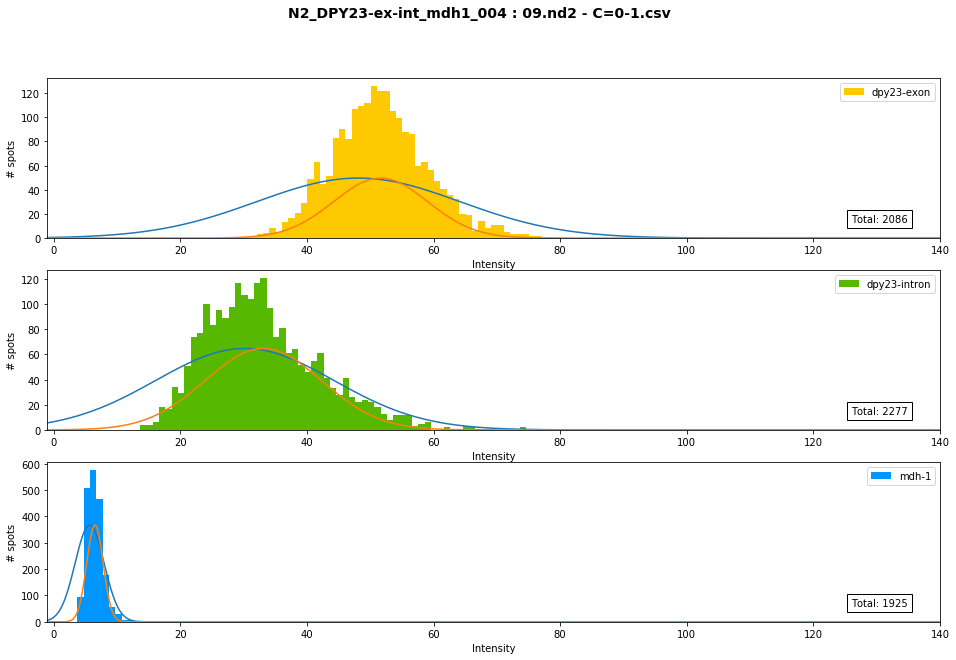

Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c1-result/10.nd2 - C=0-1.csv
3.60796755512 vs 61.8610721588
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c1-result/10.nd2 - C=0-1.txt
x_0: 33.7242237007
A: 33.7539312281
b: 0.00240917183381
Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c3-result/10.nd2 - C=2-1.csv
3.60796755512 vs 6.01841245595
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c3-result/10.nd2 - C=2-1.txt
x_0: 4.9971744761
A: 1220.0
b: 0.0389490337604
Processing: /Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c2-result/10.nd2 - C=1-1.csv
3.60796755512 vs 3.6215490121
Processing: /Users/kkolyva/pretty-graphs/data/gauss/N2_DPY23-ex-int_mdh1_004/c2-result/10.nd2 - C=1-1.txt
x_0: 2.52380952381
A: 81.0
b: 0.308176100629


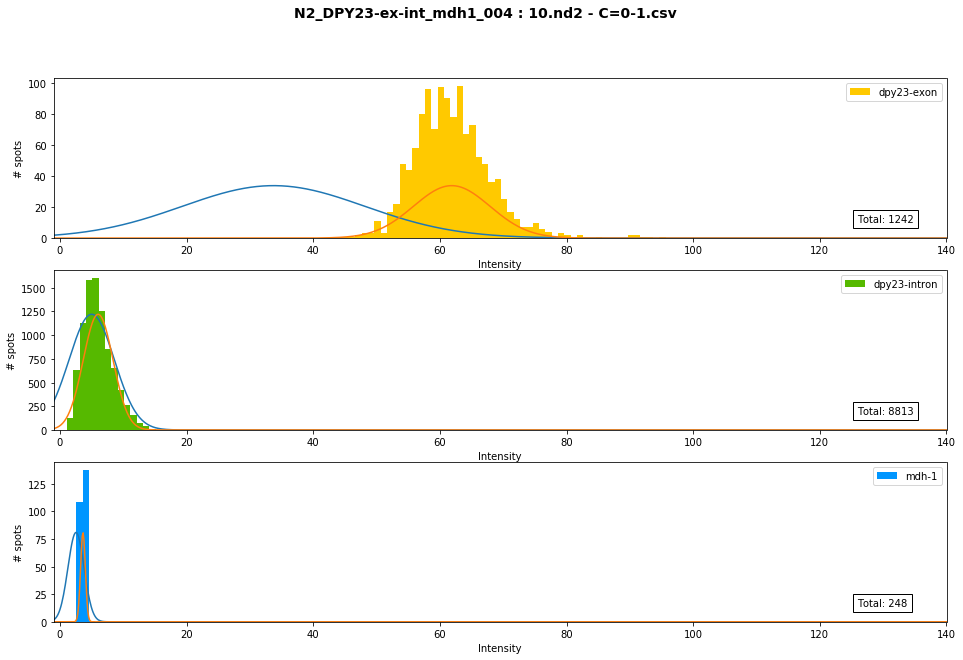

In [97]:
# actual plotting 
labels = ["dpy23-exon", "dpy23-intron", "mdh-1"]
colors = ["#ffc900", "#56b900", "#0096ff"] # yellow, green, blue
binwidth = [1, 1, 1]

scaling = 100 # it is necessary to see how good the gaussian fit worked out 
# the limits of the canvas
xmin = -1
xmax = 140

for idx in range(0, len(dataset)):
    # create the canvas
    fig = plt.figure(figsize=(16,10))
    title = create_title(dataset[idx][0])

    fig.suptitle(title, fontsize=14, fontweight='bold')
    for j in range(0, 3): # iterate over all channels
        # feedback
        print("Processing:", dataset[idx][j])
           
        # load the data and scale it accordingly
        I = load_data(dataset[idx][j]) / scaling
        
        # TODO: threshold the data 
        # TODO: smoothen the data
        I_res = running_average_strides(I)
        I = I_res
        (h_mu, h_sigma) = norm.fit(I_res)
        # I = I_res
        # I_f = filter_histogram(I, th)
#         (h_mu_init, h_sigma_init) = norm.fit(I)
#         th = h_mu_init
#         I_f = filter_intensity(I, th)
#         (h_mu, h_sigma) = norm.fit(I_f)
#         I = I_f
        
        print(h_mu_init, "vs", h_mu)
        
        # create one of the subplot images
        ax = fig.add_subplot(3,1,j + 1)
        ax.hist(I, bins=np.arange(min(I), max(I) + binwidth[j], binwidth[j]), color=colors[j], label=labels[j])
        
        # create the path to the gauss fit parameters
        gauss_path = create_path(dataset[idx][j])
        # if the gauss fit exists 
        if (os.path.isfile(gauss_path)):
            print("Processing:", gauss_path)
            params = load_parameters(gauss_path)
            x_0 = params[0]
            A = params[1]
            b = params[2]
            x = np.linspace(xmin, xmax, 1000)
            y = f_x(x, A, b, x_0)
            # debug
            print ("x_0:", x_0)
            print ("A:", A)
            print ("b:", b)
            
            ax.plot(x, y)
            y_another = f_x(x, A, 1 / (h_sigma*h_sigma*2), h_mu)
            ax.plot(x, y_another)
        else:
            print("Skipped!")
        
        
        # reasonable adjustments to make the data look nicer
        ax.set_xlabel('Intensity')
        ax.set_ylabel('# spots')
        ax.text(0.9, 0.1, "Total: " + str(I.shape[0]), color='black', bbox=dict(facecolor='white', alpha=1), transform=ax.transAxes)
        ax.set_xlim([xmin, xmax])
#         if (j == 2):
#             ax.set_ylim([0, 2500])
#         else:
#             ax.set_ylim([0, 200])
        plt.legend(loc = 'upper right')

#     if not os.path.exists(folder_path + "histograms/" + image):
#         os.makedirs(folder_path + "histograms/" + image)
    # plt.savefig(folder_path + "histograms/" + image + "/" + title + ".png")
    plt.show()
    # break

In [18]:
## Sandbox below

In [21]:
file_gauss = "/Users/kkolyva/Desktop/wow-desktop/results/gauss"
image_name = "MK4_DPY23-ex-int_mdh1_003"
folder = "c1-result"
file = "06.nd2 - C=0-2.txt"

# the data is contained in the following format 
# x_0, A, b

full_file_path = file_gauss + "/" + image_name + "/" + folder + "/" + file
print("Processing :", full_file_path)
data = np.loadtxt(full_file_path, delimiter = ' ') # whitespace is the default delimiter, too

print("Loaded!")

Processing : /Users/kkolyva/Desktop/wow-desktop/results/gauss/MK4_DPY23-ex-int_mdh1_003/c1-result/06.nd2 - C=0-2.txt
Loaded!


In [22]:
print(data)

[  1.46405763e+01   2.00923398e+01   1.06433483e-02]


In [22]:
# validation that fitting is working properly
shitty_fitting_path = "/Users/kkolyva/pretty-graphs/data/processed/N2_DPY23-ex-int_mdh1_004/c1-result/10.nd2 - C=0-1.csv"



In [25]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# read data from a text file. One number per line
I = load_data(shitty_fitting_path) / scaling
norm.fit(I)

# datos = np.loadtxt(shitty_fitting_path, delimiter = ' ') # whitespace is the default delimiter, too

# # best fit of data
# (mu, sigma) = norm.fit(datos)

# # the histogram of the data
# n, bins, patches = plt.hist(datos, 60, normed=1, facecolor='green', alpha=0.75)

# # add a 'best fit' line
# y = mlab.normpdf( bins, mu, sigma)
# l = plt.plot(bins, y, 'r--', linewidth=2)

# #plot
# plt.xlabel('Smarts')
# plt.ylabel('Probability')
# plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
# plt.grid(True)

# plt.show()

(61.878230856570504, 16.037311613128221)